In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
def prep_data(filepaths):
    dfs = [] #initialize a list of pd dataframes

    #go through each of the filepath strings and read the csv, then append to the dataframe
    for i in range(len(filepaths)):
        d = pd.read_csv(filepaths[i])
        dfs.append(d)

    df_out = dfs[0]
    name1 = df_out['Symbol'].iloc[0]
    names = ['Date',f'Close_{name1}']

    for i in range(1,len(dfs)):
        name1,name2 = dfs[i-1]['Symbol'].iloc[0],dfs[i]['Symbol'].iloc[0]
        names.append(f'Close_{name2}')
        
        df_out = df_out.merge(dfs[i], how='outer', left_on='Date', right_on='Date',suffixes=(f'_{name1}', f'_{name2}'))

    df_out = df_out[names]   
    df_out = df_out.set_index('Date',drop=True)
    
    return df_out.dropna()



data1 = pd.read_csv('/Users/manuelhanuch/Downloads/crypto_daily_data/coin_Bitcoin.csv')
data2 = pd.read_csv('/Users/manuelhanuch/Downloads/crypto_daily_data/coin_Ethereum.csv')

dfs = [data1,data2]
min_rows = dfs[0]

for df in dfs:
    if df.shape[0] <min_rows.shape[0]:
        min_rows = df


a = ['/Users/manuelhanuch/Downloads/crypto_daily_data/coin_Bitcoin.csv','/Users/manuelhanuch/Downloads/crypto_daily_data/coin_Ethereum.csv']

In [11]:
df = prep_data(a)
df[['Close_ETH']].values

array([[7.53324986e-01],
       [7.01897025e-01],
       [7.08447993e-01],
       ...,
       [2.32172411e+03],
       [2.19858246e+03],
       [2.32467945e+03]])

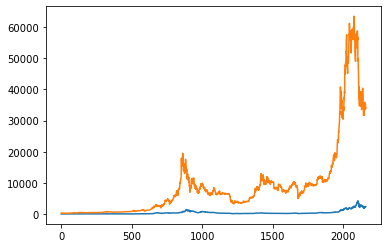

In [13]:
#plt.plot(df[['Close_BTC']])
plt.plot(df[['Close_ETH']].values)
plt.plot(df[['Close_BTC']].values)

In [13]:
df_out = data1.merge(data2, how='outer', left_on='Date', right_on='Date',suffixes=('_BTC', '_ETH'))
(df_out.dropna()).shape

(2160, 11)

In [15]:
df_out = data2.merge(data1, how='outer', left_on='Date', right_on='Date',suffixes=('_ETH', '_BTC'))
df_out.dropna()

,SNo,Name,Symbol,Date,High,Low,Open,Close_ETH,Volume,Marketcap,Close_BTC
0,1.0,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07,260.997009
1,2.0,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07,265.083008
2,3.0,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07,264.470001
3,4.0,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07,270.385986
4,5.0,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07,266.376007
...,...,...,...,...,...,...,...,...,...,...,...
2155,2156.0,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,33897.048590
2156,2157.0,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,34668.548402
2157,2158.0,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,35287.779766
2158,2159.0,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11,33746.002456


In [33]:
name = data1['Symbol'].iloc[0]
print(f'test {name}')

test BTC


In [8]:
data1 = data1[['Date','Close']]
data1.iloc[0]

Date     2013-04-29 23:59:59
Close             144.539993
Name: 0, dtype: object

In [20]:
for i in range(5):
    print(i)

0
1
2
3
4


In [14]:
df = pd.read_csv('btc_wrappedBtc')
df

,Date,Close_BTC,Close_WBTC
0,2019-01-31 23:59:59,3457.792747,3466.506533
1,2019-02-01 23:59:59,3487.945387,3480.772314
2,2019-02-02 23:59:59,3521.060787,3542.095361
3,2019-02-03 23:59:59,3464.013326,3477.866026
4,2019-02-04 23:59:59,3459.154146,3481.219346
...,...,...,...
883,2021-07-02 23:59:59,33897.048590,33824.263339
884,2021-07-03 23:59:59,34668.548402,34676.985915
885,2021-07-04 23:59:59,35287.779766,35289.762931
886,2021-07-05 23:59:59,33746.002456,33806.661764


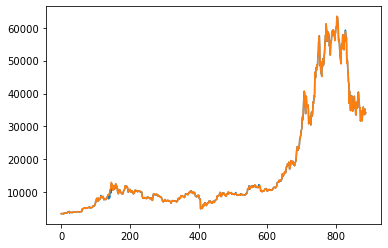

In [15]:
plt.plot(df[['Close_WBTC']].values)
plt.plot(df[['Close_BTC']].values)